# Análisis Exploratorio de los Datos

Se llevó a cabo un estudio de análisis de datos para encontrar patrones comprensibles de desempeño de las telecomunicaciones a nivel nacional en Argentina, con un enfoque particular en los servicios de Internet. El objetivo principal es identificar tendencias que permitan generar información crítica para la toma de decisiones relacionadas con el crecimiento, la mejora de la calidad de los servicios y la formulación de decisiones estratégicas.

In [23]:
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

Tipo de Técnologia
        
--> **ADSL =** También conocida como Asymmetric Digital Subscriber Line o Línea de Abonado Digital Asimétrica, es una tecnología de módem que convierte una línea telefónica o un par de cobre de suscriptor en una línea fija de alta velocidad. La tecnología funciona controlando tres canales: dos canales de alta velocidad, uno para recepción de datos, otro para transmisión de datos y un tercer canal para comunicaciones de voz estándar que brindan servicios telefónicos básicos.

--> **Cablemódem =**  Es un varienate de módem que facilita la utilización del ancho de banda que no es utilizado en la transmisión de televisión por cable, destinándolo a la conexión de Internet. Tanto los cables coaxiales como la infraestructura HFC (Hybrid Fiber Coaxial) tienen la capacidad de transmitir considerables volúmenes de datos en ambas direcciones.

--> **Dial Up =** Emplea un módem en conjunto con una línea telefónica. El módem se enlaza al ordenador, facilitando la transmisión y recepción de datos a través de la línea telefónica. Al iniciar la conexión, el módem inicia una llamada telefónica al proveedor de servicios de Internet (ISP), estableciendo así una conexión estable. Es importante tener en cuenta que la velocidad de conexión de dial-up es bastante lenta, lo que implica limitaciones en la capacidad de carga y descarga de datos.

--> **Fibra Óptica =** Es una tecnología avanzada que posibilita la transmisión de datos mediante luz. Está compuesta por cables que contienen hebras de vidrio, las cuales transmiten información, como señales de teléfono, televisión e Internet, a través de pulsos de luz infrarroja. Las fibras ópticas guían pulsos de láser o luz LED por la línea, transmitiendo información de manera "binaria", similar al sistema de 0 y 1 utilizado en electrónica. Una de las ventajas notables es su rápida capacidad de transferencia de datos.

--> **Wimax =** Es una tecnología de comunicaciones de red inalámbrica de próxima generación. La tecnología es similar a Wi-Fi, pero proporciona acceso de banda ancha de alta velocidad en un área más grande con menos interferencia.

--> **Wireless =** WiFi o wireless es Wire (cable) Less (sin) es una tecnología que implica la transmisión de datos entre dispositivos sin la necesidad de conexiones físicas. Utiliza el Protocolo 802.11 y opera en el aire como medio de transmisión, específicamente en una frecuencia de emisión de 2,4 GHz. Algunas variantes del Protocolo 802.11 también pueden emplear el rango de frecuencias de 5,4 GHz. Estas frecuencias libres, aunque eficientes, tienen limitaciones ya que no pueden penetrar paredes u obstáculos.


###  ***Acceso a Internet fijo por tecnología y provincia***

In [24]:
Df_Tec_Prov = pd.read_csv("../data/limpios/Conexiones_x_Provincia.csv")
Df_Tec_Prov.head(3)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,4,Buenos Aires,326,3,1,130,72,532
1,2022,4,CABA,139,1,139,5,32,316
2,2022,4,Córdoba,152,457,367,62,11,1049


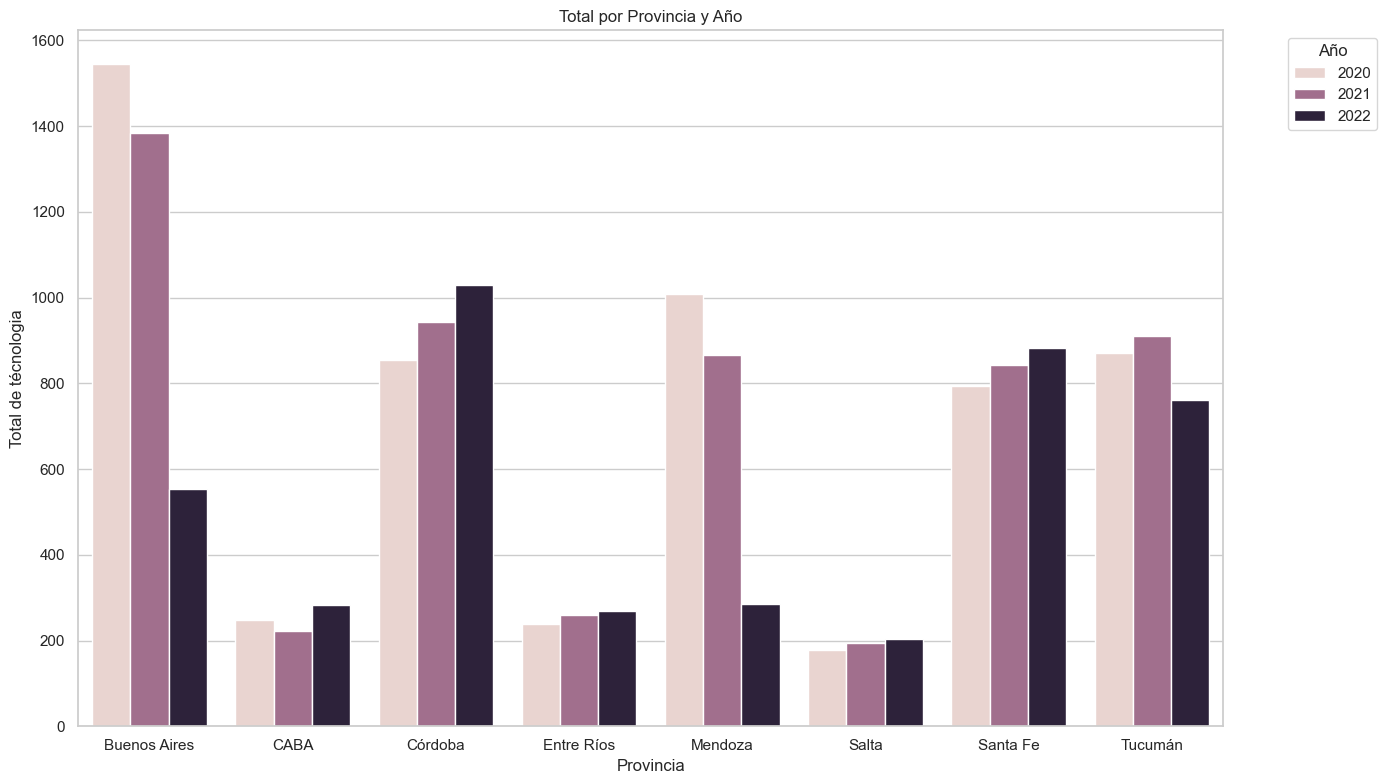

In [25]:

# Se configurar el estilo de seaborn
sns.set(style="whitegrid")

# Se crear el gráfico de barras agrupado por provincia y año
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Provincia', y='Total', hue='Año', data=Df_Tec_Prov, ci=None)

plt.title('Total por Provincia y Año')
plt.xlabel('Provincia')
plt.ylabel('Total de técnologia')
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

En esta representación gráfica de barras, se visualiza la cantidad total de tecnologías en las provincias de CABA, Buenos Aires, Córdoba, Entre Ríos, Mendoza, Salta, Santa Fe y Tucumán. Inicialmente, se aprecia un aumento en el acceso a Internet durante en el año 2022 con respecto al año anterior, considerando todas las tecnologías disponibles (Fibra óptica, ADSL, etc.). Este incremento es notable en provincias como CABA, Córdoba, Entre Ríos, Salta y Santa Fe. En contraste, en provincias como Buenos Aires, Mendoza y Tucumán ya que el crecimiento ha sido más moderado.

In [26]:
Df_Tec_Prov.head(3)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,4,Buenos Aires,326,3,1,130,72,532
1,2022,4,CABA,139,1,139,5,32,316
2,2022,4,Córdoba,152,457,367,62,11,1049


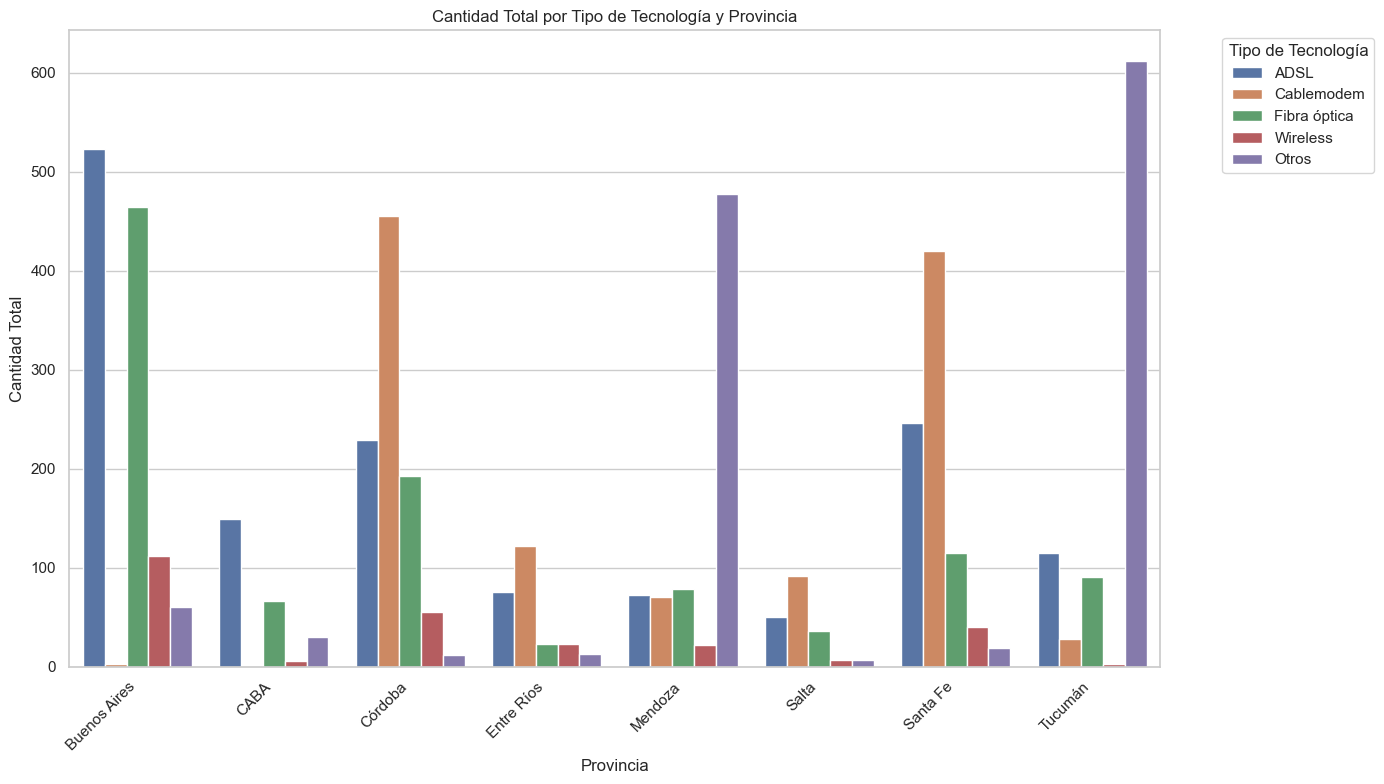

In [27]:
# Se configura el estilo de seaborn
sns.set(style="whitegrid")

# Se convierte el DF a un formato largo 
df_melted = pd.melt(Df_Tec_Prov, id_vars=['Año', 'Trimestre', 'Provincia'], # variables que se mantienen sin modificar
                    value_vars=['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros'], # son las columnas que se apilan en una única columna. 
                    var_name='Tipo de Tecnologia', value_name='Cantidad Total') # Esta es la nueva columna que se crea para almacenar los nombres de las tecnologías (ADSL, Cablemodem, etc.) y su la cantidad total.

# Se crea el gráfico de barras apiladas por tecnología y provincia
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Provincia', y='Cantidad Total', hue='Tipo de Tecnologia', data=df_melted, ci=None)

# Se rotan los nombres de las provincias en el eje x para mejorar la legibilidad
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Cantidad Total por Tipo de Tecnología y Provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad Total')
plt.legend(title='Tipo de Tecnología', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



Se observa que Buenos Aires es la provincia con una mayor demanda de servicios de Internet, especialmente a través de tecnologías como 'Fibra Óptica' la cual se destacan por ofrecer una conexión más eficiente gracias a sus mayores capacidades de ancho de banda y velocidad, siendo esta la opción más destacada. En contraste, en otras provincias, se utilizan tecnologías más antiguas como 'ADSL' y 'Otros'. Esta disparidad posiblemente se debe a las variaciones en la infraestructura de conectividad en los distintos departamentos de cada provincia. Es decir, hay zonas donde la conexión a Internet no se realiza a través de cable debido a la falta de cobertura, lo que lleva al uso de otras tecnologías, como la satelital.


### ***Accesos a Internet fijo por tecnología y localidad***

In [28]:
Df_Tec_Loca = pd.read_csv("../data/limpios/Conexiones_x_Localidad.csv")
Df_Tec_Loca.head(3)

,Provincia,Partido,Localidad,ADSL,Cablemódem,Dial Up,Fibra Óptica,Otros,Satelital,Wimax,Wireless,Total General
0,Buenos Aires,25 de Mayo,25 de Mayo,874,454,0,3,0,852,0,706,2889
1,Buenos Aires,25 de Mayo,del Valle,181,0,0,0,10,1,0,0,192
2,Buenos Aires,25 de Mayo,Gobernador Ugarte,0,0,0,0,0,0,0,181,181


In [29]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

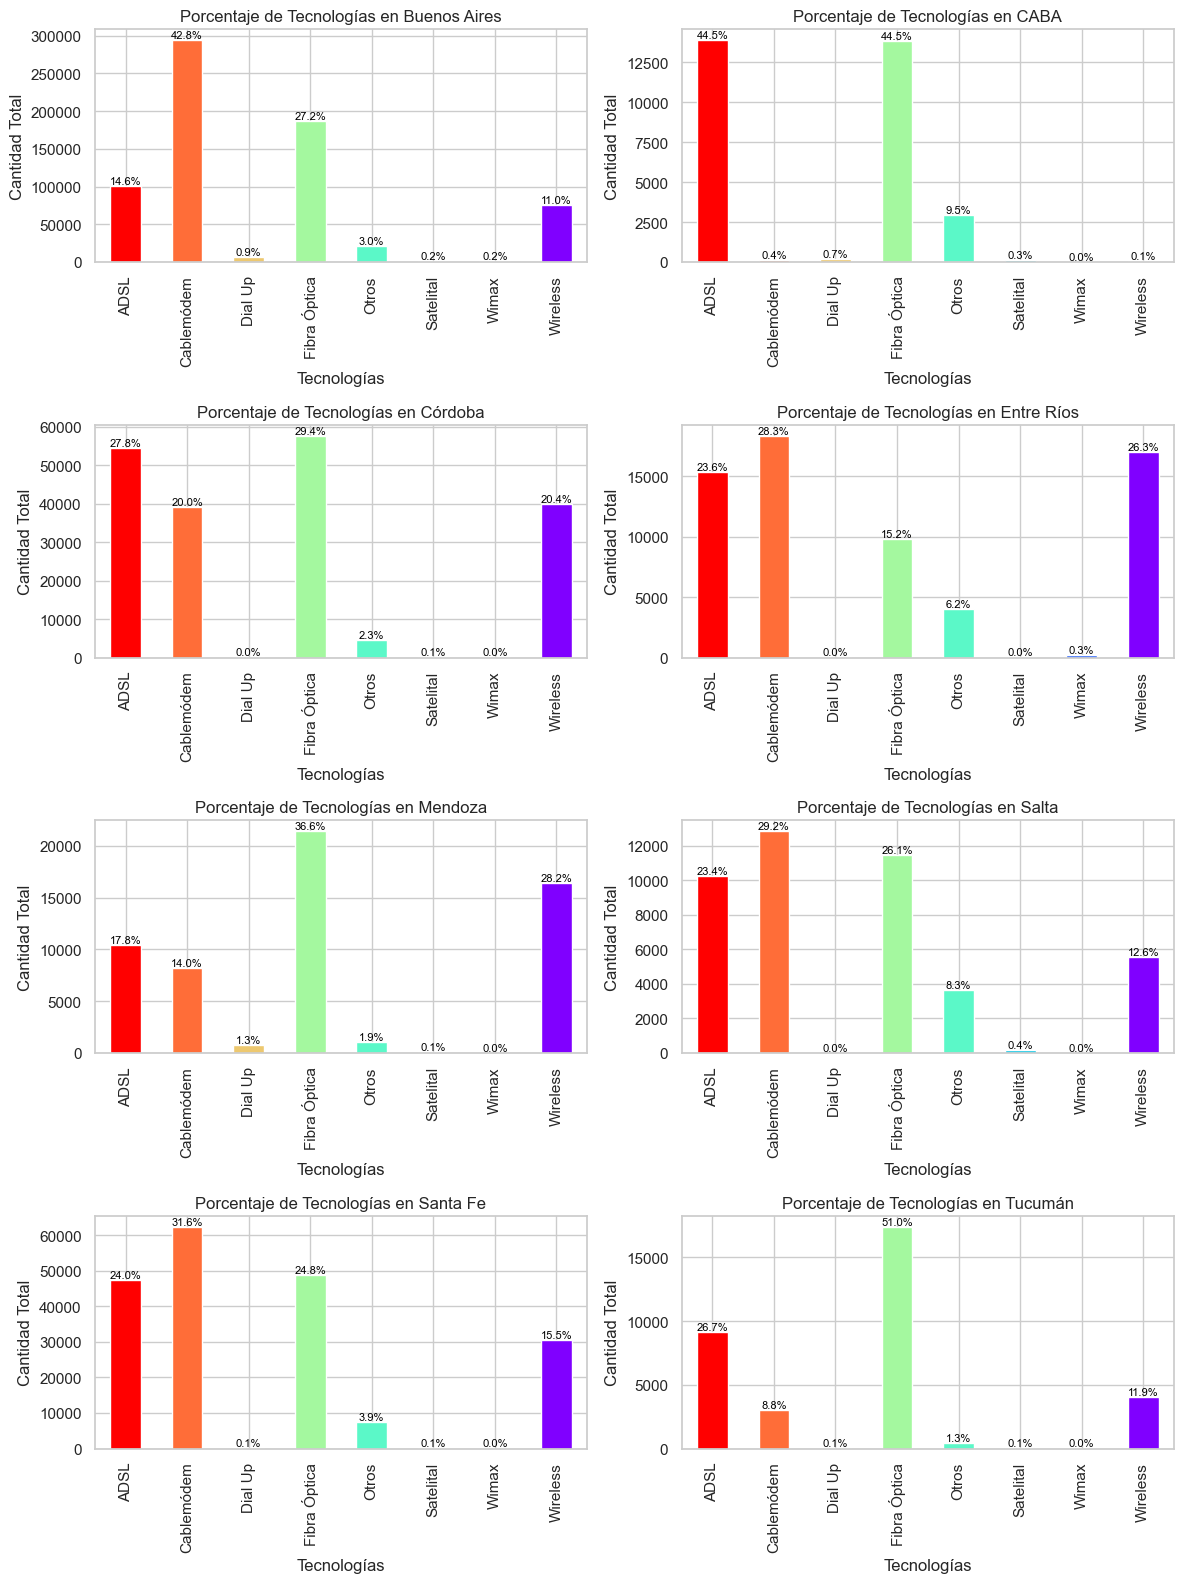

In [30]:
# Lista de colores para los gráficos de barras
colores = plt.cm.rainbow_r(np.linspace(0, 1, 8))

# Se define una variable donde estan las tecnologias de conexión
columnas_tecnologias = ['ADSL', 'Cablemódem', 'Dial Up', 'Fibra Óptica', 'Otros', 'Satelital', 'Wimax', 'Wireless']

# Se crea una figura y ejes para el gráfico
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))

# Se crea un ciclo for para iterar sobre las provincias
for i, provincia in enumerate(Df_Tec_Loca['Provincia'].unique()):
    # Se calcula la posición en la cuadrícula de subgráficos
    fila = i // 2
    columna = i % 2
    
    # Se filtra el DataFrame para una provincia específica
    df_provincia = Df_Tec_Loca[Df_Tec_Loca['Provincia'] == provincia]
    
    # Se crea un ciclo for para los datos para la provincia actual
    if not df_provincia.empty:
        # Se seleccionan las tecnologías de la provincia actual
        df_tecnologias = df_provincia[columnas_tecnologias]
        
        # Se verifica si hay datos para las tecnologías seleccionadas
        if not df_tecnologias.empty:
            # Se crea un gráfico de barras en el subplot correspondiente
            ax = df_tecnologias.sum().plot(kind='bar', ax=axes[fila, columna], color=colores)
            
            # Se añaden etiquetas con porcentajes dentro de cada barra
            total = df_tecnologias.sum().sum()
            for bar, val in zip(ax.patches, df_tecnologias.sum()):
                height = bar.get_height()
                porcentaje = f'{val/total*100:.1f}%'
                axes[fila, columna].text(bar.get_x() + bar.get_width() / 2, height, porcentaje,
                                         ha='center', va='bottom', fontsize=8, color='black')

            # Se dan ajustes de título y etiquetas de los ejes
            axes[fila, columna].set_title(f'Porcentaje de Tecnologías en {provincia}')
            axes[fila, columna].set_xlabel('Tecnologías')
            axes[fila, columna].set_ylabel('Cantidad Total')


plt.tight_layout()
plt.show()


Al evaluar la disponibilidad de conexiones a través de fibra óptica, se evidencia que la provincia de Tucumán lidera en infraestructura para proporcionar este servicio, seguida por la Ciudad Autónoma de Buenos Aires (CABA). En contraste, el resto de las provincias muestran porcentajes que oscilan entre el 15% y el 37%, indicando que esta tecnología aún no está disponible en todos los departamentos de esas regiones.

En cuanto a la conexión por cablemódem, se observa una mayor demanda en las provincias de CABA y Buenos Aires, siendo estas las únicas que muestran una demanda notable en comparación con otras provincias. Además, se aprecia que aún existen conexiones a Internet a través de ADSL en algunas áreas.

Asimismo, se destaca la conexión inalámbrica (Wireless), que representa el acceso gratuito a Internet proporcionado por el gobierno en lugares públicos. Esta modalidad muestra un porcentaje significativo en cada provincia, lo que sugiere una amplia cobertura para el acceso a Internet en general.

### ***Listado_localidades_conectividad_internet***

In [31]:
Df_Lis_Tecno = pd.read_csv('../data/limpios/Lista_Tecnologia_x_Localidad.csv' )
Df_Lis_Tecno.head(3)

,Provincia,Partido,Localidad,ADSL,Cablemódem,Dial Up,Fibra Óptica,4G,3G,Telefonía Fija,Wireless,Satelital
0,Buenos Aires,9 de Julio,Alfredo Demarchi (est. Facundo Quiroga),1,0,0,0,1,1,1,0,0
1,Buenos Aires,9 de Julio,Carlos María Naón,0,0,0,0,1,1,1,0,0
2,Buenos Aires,9 de Julio,Dudignac,0,0,1,0,1,1,1,1,0


In [32]:
Df_Lis_Tecno['Provincia'].unique()

array(['Buenos Aires', 'CABA', 'Córdoba', 'Entre Ríos', 'Mendoza',
       'Salta', 'Santa Fe', 'Tucumán'], dtype=object)

In [43]:
# Cantidad de localidades por provincia
conteo_localidades = Df_Lis_Tecno.groupby('Provincia')['Localidad'].count().reset_index()
conteo_localidades


,Provincia,Localidad
0,Buenos Aires,808
1,CABA,48
2,Córdoba,468
3,Entre Ríos,168
4,Mendoza,172
5,Salta,120
6,Santa Fe,368
7,Tucumán,103


In [41]:
# Se listan las localidades sin Fibra
localidades_sin_fibra = Df_Lis_Tecno[Df_Lis_Tecno['Fibra Óptica'].eq(0)].groupby('Provincia')['Localidad'].count()
localidades_sin_fibra

Provincia
Buenos Aires    346
Córdoba         293
Entre Ríos      120
Mendoza          96
Salta            34
Santa Fe        228
Tucumán          83
Name: Localidad, dtype: int64

In [42]:
# Se listan las localidades sin cable
localidades_sin_Cablemódem = Df_Lis_Tecno[Df_Lis_Tecno['Cablemódem'].eq(0)].groupby('Provincia')['Localidad'].count()
localidades_sin_Cablemódem

Provincia
Buenos Aires    466
Córdoba         380
Entre Ríos      129
Mendoza         154
Salta           104
Santa Fe        230
Tucumán          98
Name: Localidad, dtype: int64

In [ ]:
Df_Lis_Tecno['Fibra Óptica']

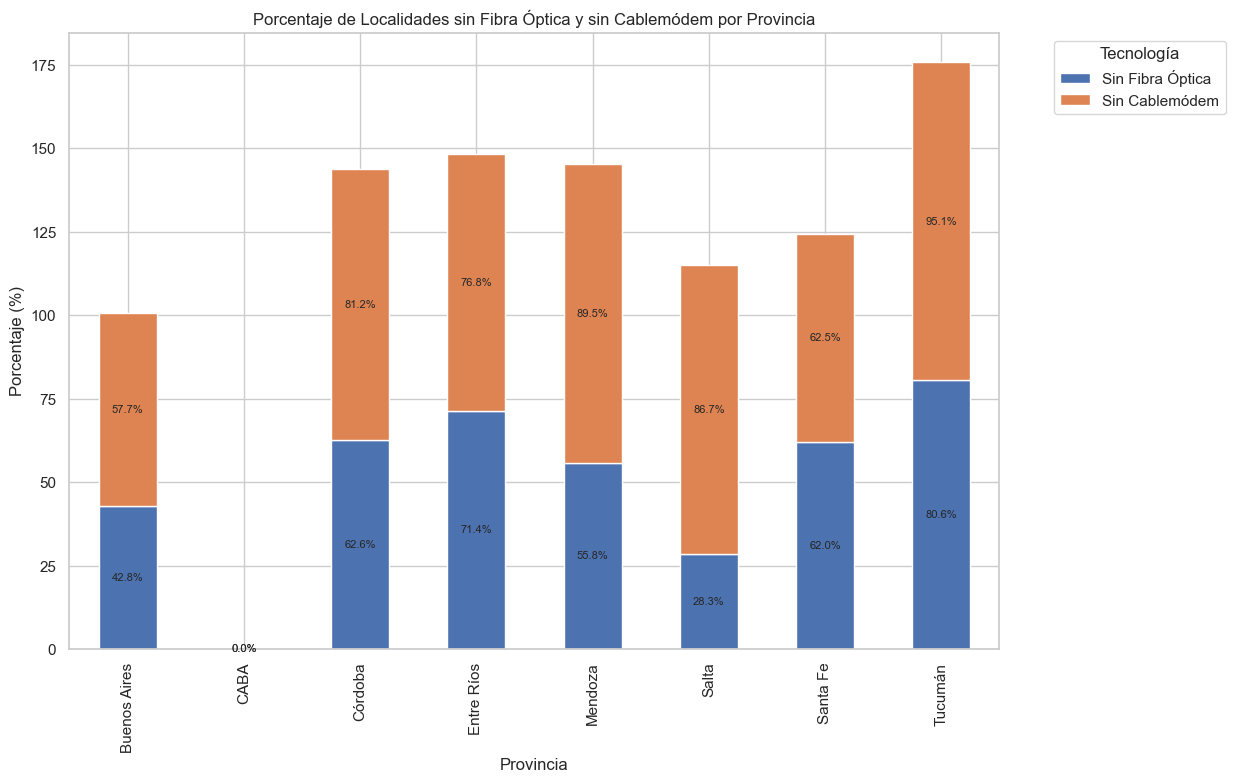

In [67]:
# Se Definen columnas para saber cuantas localidades no tienen cierta tecnologia 
Df_Lis_Tecno['Sin Fibra Óptica'] = (Df_Lis_Tecno['Fibra Óptica'] == 0).astype(int)
Df_Lis_Tecno['Sin Cablemódem'] = (Df_Lis_Tecno['Cablemódem'] == 0).astype(int)

# Se agrupan por provincia y se calcula el porcentaje de localidades sin Fibra Óptica y sin Cablemódem
df_agrupado = Df_Lis_Tecno.groupby('Provincia').agg({
    'Sin Fibra Óptica': 'mean',
    'Sin Cablemódem': 'mean'
}).mul(100)

# Se grafica el porcentaje para cada provincia
ax = df_agrupado.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Porcentaje de Localidades sin Fibra Óptica y sin Cablemódem por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Porcentaje (%)')
plt.legend(title='Tecnología', bbox_to_anchor=(1.05, 1), loc='upper left')

# Se etiquetan los porcentajes en las barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=8)

plt.show()

Este gráfico proporciona una visión detallada del porcentaje de localidades que no cuentan con acceso a servicios de Fibra Óptica y Cablemódem. Es relevante observar que en la mayoría de las provincias, la falta de estos servicios es notable, superando el umbral del 40%. Este indicador resalta la necesidad de expandir y mejorar la infraestructura de conectividad en diversas localidades dentro de cada provincia para satisfacer las demandas crecientes de acceso a Internet de alta velocidad.

In [ ]:
# Se crea una variable con las provincias desedas
provincias_seleccionadas = ['Ciudad Autónoma de Buenos Aires', 'Buenos Aires', 'Córdoba', 'Entre Ríos', 'Mendoza', 'Salta', 'Santa Fe', 'Tucumán']

# Se carga el csv
df = pd.read_csv('../data/censo/jurisdiccion.csv')

# Se crea un df solo con las provincias antes mencionadas
df_pro = df[df['Jurisdicción'].isin(provincias_seleccionadas)]
df_pro = df_pro.reset_index(drop=True)
df_pro

,Jurisdicción,Total de población,Total Viviendas
0,Ciudad Autónoma de Buenos Aires,3120612,1640710
1,Buenos Aires,17569053,6701808
2,Córdoba,3978984,1633904
3,Entre Ríos,1426426,560557
4,Mendoza,2014533,710098
5,Salta,1440672,479199
6,Santa Fe,3556522,1460580
7,Tucumán,1703186,555801


In [ ]:
# Se renombra una columna
df_pro.rename(columns={'Jurisdicción':'Provincia'},inplace=True)

# Se renombra una provincia
df_pro['Provincia'] = df_pro['Provincia'].replace({'Ciudad Autónoma de Buenos Aires':'CABA'})
df_pro

,Provincia,Total de población,Total Viviendas
0,CABA,3120612,1640710
1,Buenos Aires,17569053,6701808
2,Córdoba,3978984,1633904
3,Entre Ríos,1426426,560557
4,Mendoza,2014533,710098
5,Salta,1440672,479199
6,Santa Fe,3556522,1460580
7,Tucumán,1703186,555801


In [ ]:
Df_Tec_Loca

,Provincia,Partido,Localidad,ADSL,Cablemódem,Dial Up,Fibra Óptica,Otros,Satelital,Wimax,Wireless,Total General
0,Buenos Aires,25 de Mayo,25 de Mayo,874,454,0,3,0,852,0,706,2889
1,Buenos Aires,25 de Mayo,del Valle,181,0,0,0,10,1,0,0,192
2,Buenos Aires,25 de Mayo,Gobernador Ugarte,0,0,0,0,0,0,0,181,181
3,Buenos Aires,25 de Mayo,Norberto de La Riestra,0,782,0,6,167,0,0,327,1282
4,Buenos Aires,25 de Mayo,Lucas Monteverde,0,0,0,0,0,0,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1939,Tucumán,Tafí Viejo,Villa Mariano Moreno - El Colmenar,0,31,0,373,0,0,0,0,404
1940,Tucumán,Trancas,San Pedro de Colalao,0,0,0,0,0,0,0,313,313
1941,Tucumán,Trancas,Villa de Trancas,126,0,0,0,33,0,0,101,260
1942,Tucumán,Yerba Buena,Villa Carmela,15,0,0,0,1,0,0,97,113


In [ ]:
df_agrupado = Df_Tec_Loca.groupby('Provincia')['Total General'].sum().reset_index()
# Se renombra una columna
df_agrupado.rename(columns={'Total General':'Total Tecnologías'},inplace=True)
df_agrupado

,Provincia,Total Tecnologías
0,Buenos Aires,684988
1,CABA,31169
2,Córdoba,196029
3,Entre Ríos,64864
4,Mendoza,58362
5,Salta,43886
6,Santa Fe,196882
7,Tucumán,34088


In [ ]:
# Se combinan los dos DF para tener un conjunto de datos necesarios para graficar
df_combinado = pd.merge(df_agrupado, df_pro, left_on='Provincia', right_on='Provincia')
df_combinado

,Provincia,Total Tecnologías,Total de población,Total Viviendas
0,Buenos Aires,684988,17569053,6701808
1,CABA,31169,3120612,1640710
2,Córdoba,196029,3978984,1633904
3,Entre Ríos,64864,1426426,560557
4,Mendoza,58362,2014533,710098
5,Salta,43886,1440672,479199
6,Santa Fe,196882,3556522,1460580
7,Tucumán,34088,1703186,555801


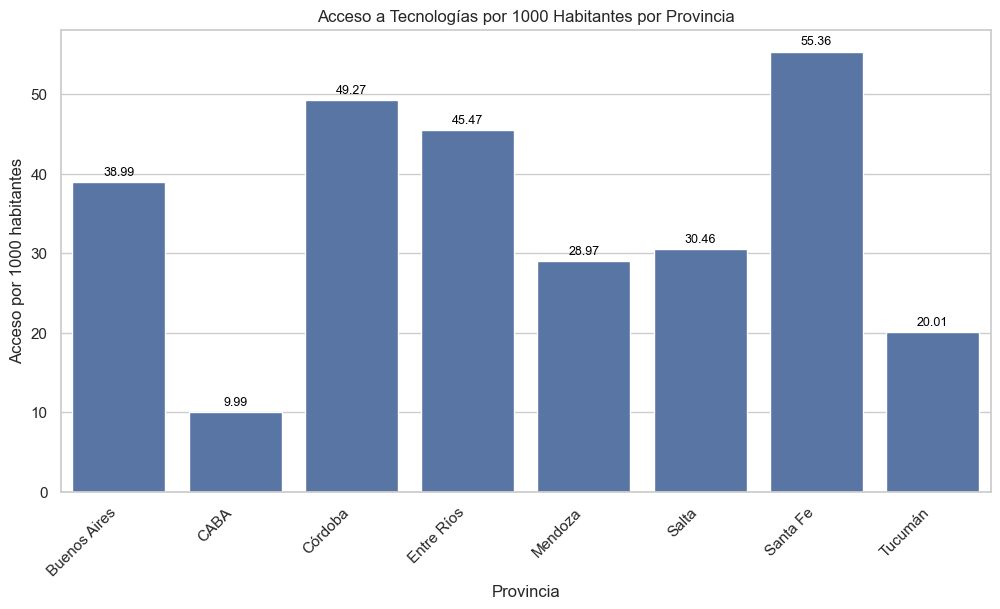

In [ ]:
# Se calcula el acceso a tecnologías por cada 1000 habitantes
df_combinado['Acceso por 1000 habitantes'] = df_combinado['Total Tecnologías'] / (df_combinado['Total de población'] / 1000)

# Se grafica la proporción por provincia
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='Provincia', y='Acceso por 1000 habitantes', data=df_combinado)
plt.title('Acceso a Tecnologías por 1000 Habitantes por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Acceso por 1000 habitantes')
plt.xticks(rotation=45, ha='right')  # Se rota las etiquetas del eje (X) para mayor legibilidad

# Se agregan las etiquetas de texto a cada barra
for index, value in enumerate(df_combinado['Acceso por 1000 habitantes']):
    bar_plot.text(index, value + 0.5, f'{value:.2f}', ha='center', va='bottom', color='black', fontsize=9)

plt.show()

Esta representación gráfica ilustra la media de tecnologías de acceso a internet por cada 1000 habitantes. En otras palabras, demuestra que, en promedio, hay una cierta cantidad de conexiones a internet, como Fibra óptica, ADSL, cablemódem, etc., por cada 1000 habitantes en diversas provincias. Por ejemplo, en Buenos Aires, la media es de alrededor de 39 conexiones por cada 1000 habitantes. Este patrón se repite para cada provincia, siendo la Ciudad Autónoma de Buenos Aires (CABA) la que presenta el menor acceso a tecnologías de acceso a internet, con aproximadamente 10 conexiones por cada 1000 habitantes en promedio. Por otro lado, la provincia de Santa Fe ostenta el mayor acceso, destacándose en este aspecto.

In [68]:
# Se realiza conteo de la cantida Fibra por provincia 
Cantidad_fibra = Df_Lis_Tecno[Df_Lis_Tecno['Fibra Óptica'].eq(1)].groupby('Provincia')['Localidad'].count()
Cantidad_fibra

Provincia
Buenos Aires    462
CABA             48
Córdoba         175
Entre Ríos       48
Mendoza          76
Salta            86
Santa Fe        140
Tucumán          20
Name: Localidad, dtype: int64

In [72]:
# Se combinan los dos DF (df_pro y Cantidad_fibra )para tener un conjunto de datos necesarios para graficar
df_combinado2 = pd.merge(Cantidad_fibra, df_pro, left_on='Provincia', right_on='Provincia')
df_combinado2.head(1)

,Provincia,Localidad,Total de población,Total Viviendas
0,Buenos Aires,462,17569053,6701808


In [74]:
# Se renombran la columna Localidad 
df_combinado2.rename(columns={'Localidad':'Total_Fibra'}, inplace=True)
df_combinado2.head(1)

,Provincia,Total_Fibra,Total de población,Total Viviendas
0,Buenos Aires,462,17569053,6701808


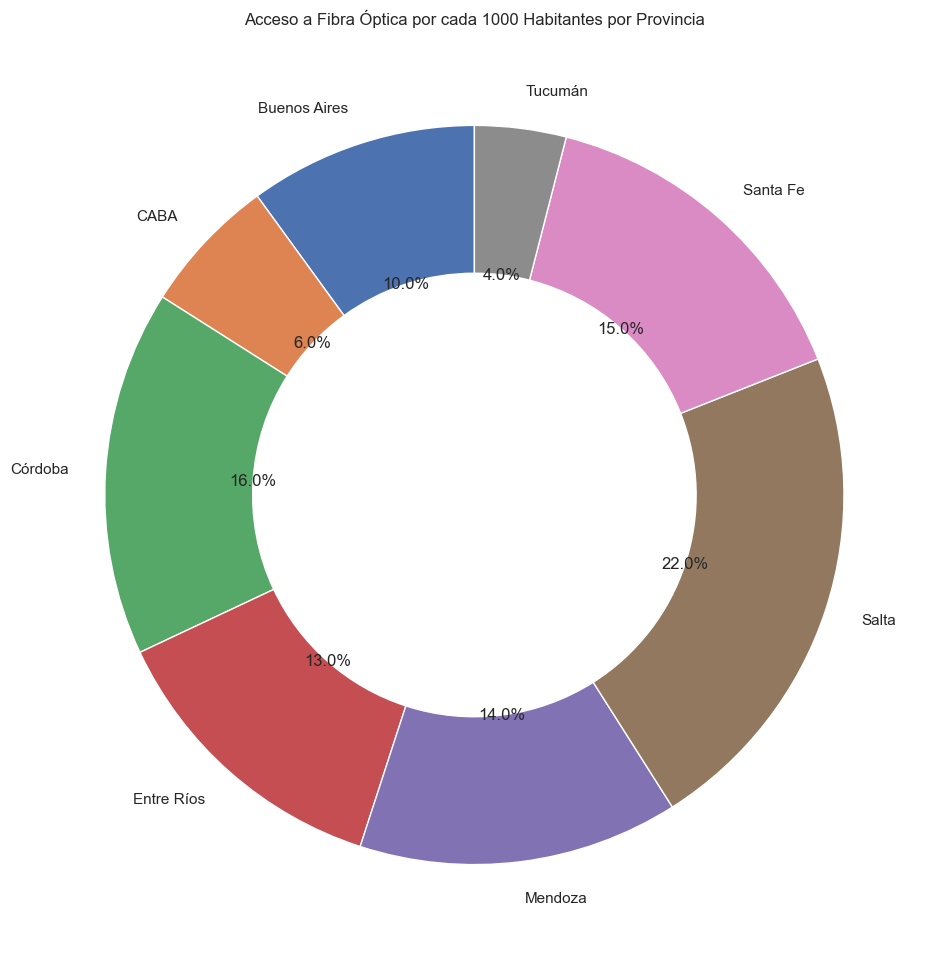

In [80]:
# Crear una nueva columna que represente el acceso a fibra óptica por cada 1000 habitantes
df_combinado2['Acceso a Fibra por 1000 Habitantes'] = (df_combinado2['Total_Fibra'] / df_combinado2['Total de población']) * 1000

# Calcular el porcentaje total para cada provincia
df_combinado2['Porcentaje'] = (df_combinado2['Acceso a Fibra por 1000 Habitantes'] / df_combinado2['Acceso a Fibra por 1000 Habitantes'].sum()) * 100

# Redondear y convertir los porcentajes al entero más cercano
df_combinado2['Porcentaje Redondeado'] = df_combinado2['Porcentaje'].round().astype(int)

# Graficar el acceso a fibra por cada 1000 habitantes por provincia en un gráfico circular
plt.figure(figsize=(12, 12))
plt.pie(df_combinado2['Porcentaje Redondeado'], labels=df_combinado2['Provincia'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))

plt.title('Acceso a Fibra Óptica por cada 1000 Habitantes por Provincia')
plt.show()

En este gráfico, se presenta la proporción de acceso a Fibra Óptica por cada 1000 habitantes en diversas provincias, brindando una visión detallada del panorama de conectividad en cada una. A través de este análisis, se destaca un ejemplo concreto: en la Ciudad Autónoma de Buenos Aires (CABA), solo alrededor de 60 personas por cada 1000 habitantes tienen acceso a la conexión por Fibra Óptica, representando aproximadamente el 6%. Este dato específico refleja la distribución desigual de la infraestructura de fibra óptica y puede sugerir áreas que podrían beneficiarse de mejoras en la conectividad.